This notebook reproduces results from Section VI: Platonic Solids of the paper
"Phase locking and multistability in the topological Kuramoto model on cell complexes".

It prints relevant boundary matrices and kernel matrices and creates Figures 5 and 6.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator, MultipleLocator
from matplotlib.gridspec import GridSpec
from matplotlib.cm import viridis
import matplotlib.cm as cm
from matplotlib import ticker

from core.complexes import (
    compute_boundary_matrices,
    get_C_from_B,
    get_K_from_B
)

from core.dynamics import (
    find_all_plus_omega_zero_solutions,
    compute_zeta_ranges_double,
    f_n_plus_one,
    f_n_minus_one,
    find_what_works_nd,
    check_stable_jacobians,
    get_psi_minus_sp,
    get_psi_plus_sp,
)

from core.platonic_solids import (
    get_platonic_solids,
)


# Import and print Platonic Solids data

In [2]:
solids = get_platonic_solids()
for name, (vertices, edges, faces, volumes) in solids.items():
    print(f"{name}:")
    print(f"  vertices count: {len(vertices)}")
    print(f"  edges count: {len(edges)}")
    print(f"  faces count: {len(faces)}")
    print(f"  volumes count: {len(volumes)}")
    print()


tetrahedron:
  vertices count: 4
  edges count: 6
  faces count: 4
  volumes count: 1

cube:
  vertices count: 8
  edges count: 12
  faces count: 6
  volumes count: 1

octahedron:
  vertices count: 6
  edges count: 12
  faces count: 8
  volumes count: 1

dodecahedron:
  vertices count: 20
  edges count: 30
  faces count: 12
  volumes count: 1

icosahedron:
  vertices count: 12
  edges count: 30
  faces count: 20
  volumes count: 1



Let's look at all the boundary matrices now.

In [3]:
for name, (S0, S1, S2, S3) in solids.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()} — boundary matrices")
    print(f"{'='*60}")

    S = [S0, S1, S2, S3]  # 0-cells, 1-cells, 2-cells, 3-cell
    B = compute_boundary_matrices(S)

    for k, Bk in enumerate(B, start=1):
        print(f"\nB{k} (maps from S_{k} to S_{k-1}): shape {Bk.shape}")
        print(Bk)


TETRAHEDRON — boundary matrices

B1 (maps from S_1 to S_0): shape (4, 6)
[[-1 -1 -1  0  0  0]
 [ 1  0  0 -1 -1  0]
 [ 0  1  0  1  0 -1]
 [ 0  0  1  0  1  1]]

B2 (maps from S_2 to S_1): shape (6, 4)
[[ 1 -1  0  0]
 [-1  0  0  1]
 [ 0  1  0 -1]
 [ 1  0 -1  0]
 [ 0 -1  1  0]
 [ 0  0 -1  1]]

B3 (maps from S_3 to S_2): shape (4, 1)
[[1]
 [1]
 [1]
 [1]]

CUBE — boundary matrices

B1 (maps from S_1 to S_0): shape (8, 12)
[[-1 -1 -1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 -1 -1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 -1 -1  0  0  0  0  0]
 [ 0  1  0  0  0  1  0 -1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0 -1 -1  0  0]
 [ 0  0  0  0  1  0  0  0  1  0 -1  0]
 [ 0  0  0  0  0  0  1  0  0  0  1 -1]
 [ 0  0  0  0  0  0  0  1  0  1  0  1]]

B2 (maps from S_2 to S_1): shape (12, 6)
[[ 1  0 -1  0  0  0]
 [-1  0  0  0  1  0]
 [ 0  0  1  0 -1  0]
 [ 1  0  0  0  0 -1]
 [ 0  0 -1  0  0  1]
 [ 1  0  0 -1  0  0]
 [ 0  0  0  1  0 -1]
 [ 0  0  0 -1  1  0]
 [ 0 -1  1  0  0  0]
 [ 0  1  0  0 -1  0]
 [ 0 -1  0  0 

We will focus on the n=1 case. We start by printing $C_1$ and $C_2$ for n=1.

In [4]:
for name, (S0, S1, S2, S3) in solids.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()} — C1 and C2 matrices (n=1)")
    print(f"{'='*60}")

    S = [S0, S1, S2, S3]
    B1, B2, B3 = compute_boundary_matrices(S)
    C1, C2 = get_C_from_B(B1, B2)

    print(f"\nC1 shape {C1.shape}  (satisfies  B1.T @ C1.T = 0; columns of C1^T span ker(B1^T)):")
    print(C1)
    print(f"\nC2 shape {C2.shape}  (satisfies  B2 @ C2   = 0; columns of C2   span ker(B2)):")
    print(C2)


TETRAHEDRON — C1 and C2 matrices (n=1)

C1 shape (1, 4)  (satisfies  B1.T @ C1.T = 0; columns of C1^T span ker(B1^T)):
[[1. 1. 1. 1.]]

C2 shape (4, 1)  (satisfies  B2 @ C2   = 0; columns of C2   span ker(B2)):
[[1.]
 [1.]
 [1.]
 [1.]]

CUBE — C1 and C2 matrices (n=1)

C1 shape (1, 8)  (satisfies  B1.T @ C1.T = 0; columns of C1^T span ker(B1^T)):
[[1. 1. 1. 1. 1. 1. 1. 1.]]

C2 shape (6, 1)  (satisfies  B2 @ C2   = 0; columns of C2   span ker(B2)):
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

OCTAHEDRON — C1 and C2 matrices (n=1)

C1 shape (1, 6)  (satisfies  B1.T @ C1.T = 0; columns of C1^T span ker(B1^T)):
[[1. 1. 1. 1. 1. 1.]]

C2 shape (8, 1)  (satisfies  B2 @ C2   = 0; columns of C2   span ker(B2)):
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

DODECAHEDRON — C1 and C2 matrices (n=1)

C1 shape (1, 20)  (satisfies  B1.T @ C1.T = 0; columns of C1^T span ker(B1^T)):
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

C2 shape (12, 1)  (satisfies  B2 @ C2   = 0; columns of 

Let us now find and classify all roots for n = 1. 

In [5]:
roots_ps_n1 = []
n = 1
solids = get_platonic_solids()
for key in solids:
    print(f"---{key}---")
    S = solids[key]
    sols = find_all_plus_omega_zero_solutions(S, n, False, tol = 1e-7)
    roots_ps_n1.append(sols)

---tetrahedron---
n = 1,
C_n = [[1. 1. 1. 1.]],
C_np1 = [[1.]
 [1.]
 [1.]
 [1.]]
total of 1 different z_n_vecs considered, and 1 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ((0,), (0,))
zeta_plus = [0.], zeta_minus = [0.]
Solution z+ = (0,), z- = (0,): is stable.
Solution z+ = (0,), z- = (0,): all cos(theta) > 0.
Root 1: z+ = (0,), z- = (0,), zeta_plus = [0.], zeta_minus = [0.], Stable: True, Positive: True
Cos(theta)_minus: [1. 1. 1. 1.] 
 Eig J1:[-4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -3.33814172e-16
  0.00000000e+00  7.47264880e-19]
 Cos(theta)_plus: [1. 1. 1. 1.]
 Eig J2:[-4.00000000e+00 -4.00000000e+00 -4.00000000e+00 -2.63677968e-16
 -2.22044605e-16  0.00000000e+00]

---cube---
n = 1,
C_n = [[1. 1. 1. 1. 1. 1. 1. 1.]],
C_np1 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
total of 3 different z_n_vecs considered, and 3 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ((-1,), (-1,))
zeta_plus = [-0.8660254], zeta_minus = [-0.70710678]
(z_plus

We can plot the number of stable solutions depending on the Platonic Solid.

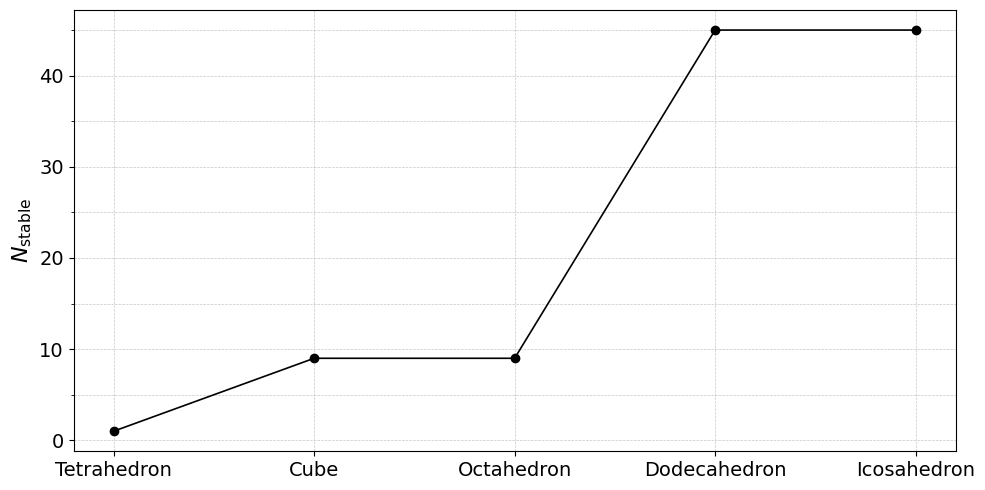

In [13]:
x = [1, 2, 3, 4, 5]
y = [len(roots) for roots in roots_ps_n1]   # number of stable roots per solid

solid_names = ['Tetrahedron', 'Cube', 'Octahedron', 'Dodecahedron', 'Icosahedron']

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    x, y,
    marker='o', linestyle='-', color='black',
    markersize=6, linewidth=1.2
)

ax.set_xticks(x)
ax.set_xticklabels(solid_names, rotation=0, fontsize=14)
ax.set_ylabel(r"$N_{\text{stable}}$", fontsize=16)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('Fig5a.pdf', bbox_inches='tight')
plt.show()


In [11]:
def plot_combined_ps(ps_data_list, resolution=1500):
    
    # Colors from viridis
    viridis = cm.get_cmap('viridis', 256)
    colors = [
        viridis(1.0),   # yellow -> tetrahedron
        viridis(0.5),   # middle -> cube & octahedron
        viridis(0.2)    # dark -> dodecahedron & icosahedron
    ]

    line_styles = [
        '-',          # tetrahedron
        '-', '--',    # cube & octahedron
        '-', '--'     # dodecahedron & icosahedron
    ]
    # Flatten colors list to match solids
    solid_colors = [
        colors[0],            # tetrahedron
        colors[1], colors[1], # cube, octahedron
        colors[2], colors[2]  # dodeca, icosahedron
    ]
    # Row 1: F1 and F2 side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey=False)
    ax1, ax2 = axes

    for idx, ps_data in enumerate(ps_data_list):
        color = solid_colors[idx]
        ls = line_styles[idx]
        
        # Compute zeta ranges
        (zeta_plus_range, zeta_minus_range) = compute_zeta_ranges_double(
            ps_data['psi_plus_sp'], ps_data['psi_minus_sp'],
            ps_data['K1'], ps_data['K2'],
            ps_data['C1'], ps_data['C2']
        )
        zp_min, zp_max = zeta_plus_range
        zm_min, zm_max = zeta_minus_range
        zeta_plus_vals = np.linspace(zp_min, zp_max, resolution)
        zeta_minus_vals = np.linspace(zm_min, zm_max, resolution)
        
        A_plus = (np.linalg.inv(ps_data['K2']) @ ps_data['C2']).flatten()
        A_minus = (np.linalg.inv(ps_data['K1']) @ ps_data['C1'].T).flatten()

        # Evaluate F1
        F1_vals = []
        for zp in zeta_plus_vals:
            psi_plus = ps_data['psi_plus_sp'].flatten() + A_plus * zp
            f_plus = f_n_plus_one(psi_plus, ps_data['S2_plus'], ps_data['S2_minus'])
            F1_vals.append(float(np.sum(ps_data['C2'].flatten() * f_plus.flatten())))
        F1_vals = np.array(F1_vals)/(2*np.pi)

        # Evaluate F2
        F2_vals = []
        for zm in zeta_minus_vals:
            psi_minus = ps_data['psi_minus_sp'].flatten() + A_minus * zm
            f_minus = f_n_minus_one(psi_minus, ps_data['S0_plus'], ps_data['S0_minus'])
            F2_vals.append(float(np.sum(ps_data['C1'].flatten() * f_minus.flatten())))
        F2_vals = np.array(F2_vals)/(2*np.pi)

        # Plot F1 and F2
        ax1.plot(zeta_plus_vals, F1_vals, color=color, linestyle=ls, label=ps_data['label'])
        ax2.plot(zeta_minus_vals, F2_vals, color=color, linestyle=ls, label=ps_data['label'])

        # Plot root intersections as dots
        for idx_r, (z_plus, z_minus, zeta_plus, zeta_minus) in enumerate(ps_data['roots']):
            is_stable = ps_data['stable_indices'] is not None and idx_r in ps_data['stable_indices']
            
            F1_val = float(np.sum(ps_data['C2'].flatten() * f_n_plus_one(
                ps_data['psi_plus_sp'].flatten() + A_plus * zeta_plus,
                ps_data['S2_plus'], ps_data['S2_minus']
            ).flatten()))/(2*np.pi)
            
            F2_val = float(np.sum(ps_data['C1'].flatten() * f_n_minus_one(
                ps_data['psi_minus_sp'].flatten() + A_minus * zeta_minus,
                ps_data['S0_plus'], ps_data['S0_minus']
            ).flatten()))/(2*np.pi)

            ax1.plot(zeta_plus, F1_val, 'o', color='black' if is_stable else 'white', markeredgecolor='black', ms = 5)
            ax2.plot(zeta_minus, F2_val, 'o', color='black' if is_stable else 'white', markeredgecolor='black', ms = 5)

    # Dashed horizontal lines at integer y
    for z in range(-5, 6):
        ax1.axhline(z, color='gray', linestyle='dashed', linewidth=1)
    for z in range(-5, 6):
        ax2.axhline(z, color='gray', linestyle='dashed', linewidth=1)
    ax1.set_xlabel(r'$\zeta^{[+]}$', fontsize=16)
    ax1.set_ylabel(r'$C_2^T f_2(\psi^{[+]})/(2\pi)$', fontsize=16)
    ax2.set_xlabel(r'$\zeta^{[-]}$', fontsize=16)
    ax2.set_ylabel(r'$C_1 f_0(\psi^{[-]})/(2\pi)$', fontsize=16)
    ax1.tick_params(axis='both', labelsize=16)
    ax2.tick_params(axis='both', labelsize=16)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.legend(fontsize=12)
    plt.savefig("Fig5b.pdf", bbox_inches='tight')
    plt.show()
    
    # Row 2: scatter plots of zeta_plus vs zeta_minus for last 4 solids (skip tetrahedron since there is no multistability)
    fig2, axes2 = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
    for idx, ps_data in enumerate(ps_data_list[1:]):  # skip tetrahedron
        ax = axes2[idx]
        for idx_r, (z_plus, z_minus, zeta_plus, zeta_minus) in enumerate(ps_data['roots']):
            is_stable = ps_data['stable_indices'] is not None and idx_r in ps_data['stable_indices']
            ax.plot(zeta_plus, zeta_minus, 'o', color='black' if is_stable else 'white', markeredgecolor='black')
        ax.set_title(ps_data['label'], fontsize=16)
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_xlabel(r'$\zeta^{[+]}$', fontsize=16)
        if idx == 0:
            ax.set_ylabel(r'$\zeta^{[-]}$', fontsize=16)
        ax.set_xticks(np.arange(-1, 1.01, 0.5))
        ax.set_yticks(np.arange(-1, 1.01, 0.5))
        ax.grid(True, which='major', linewidth=0.8)
        ax.minorticks_on()
        ax.grid(True, which='minor', linewidth=0.3)
        ax.tick_params(axis='both', labelsize=16) 

    plt.tight_layout()
    plt.savefig("Fig5c.pdf", bbox_inches='tight')
    plt.show()



We now plot stable phase-locked solutions for all Platonic solids (black dots).
In the first Figure, we will use same colors and different line styles denote dual Platonic solids to emphasize symmetry. Other than the tetrahedron, all objects exhibit structural multistability cascades where multistability arises due to interactions from both below and above.
In the second Figure, we present these solutions in the $(\zeta^{[+]}, \zeta^{[-]})$ plane for the four objects that exhibit multistability.

total of 1 different z_n_vecs considered, and 1 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ((0,), (0,))
zeta_plus = [0.], zeta_minus = [0.]
Solution z+ = (0,), z- = (0,): is stable.
total of 3 different z_n_vecs considered, and 3 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ((-1,), (-1,))
zeta_plus = [-0.8660254], zeta_minus = [-0.70710678]
(z_plus, z_minus) = ((-1,), (0,))
zeta_plus = [-0.8660254], zeta_minus = [0.]
(z_plus, z_minus) = ((-1,), (1,))
zeta_plus = [-0.8660254], zeta_minus = [0.70710678]
(z_plus, z_minus) = ((0,), (-1,))
zeta_plus = [0.], zeta_minus = [-0.70710678]
(z_plus, z_minus) = ((0,), (0,))
zeta_plus = [0.], zeta_minus = [0.]
(z_plus, z_minus) = ((0,), (1,))
zeta_plus = [0.], zeta_minus = [0.70710678]
(z_plus, z_minus) = ((1,), (-1,))
zeta_plus = [0.8660254], zeta_minus = [-0.70710678]
(z_plus, z_minus) = ((1,), (0,))
zeta_plus = [0.8660254], zeta_minus = [0.]
(z_plus, z_minus) = ((1,), (1,))
zeta_plus = [0.8660254], zeta

C:\Users\i.bacic\AppData\Local\Temp\ipykernel_6256\587165228.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 256)


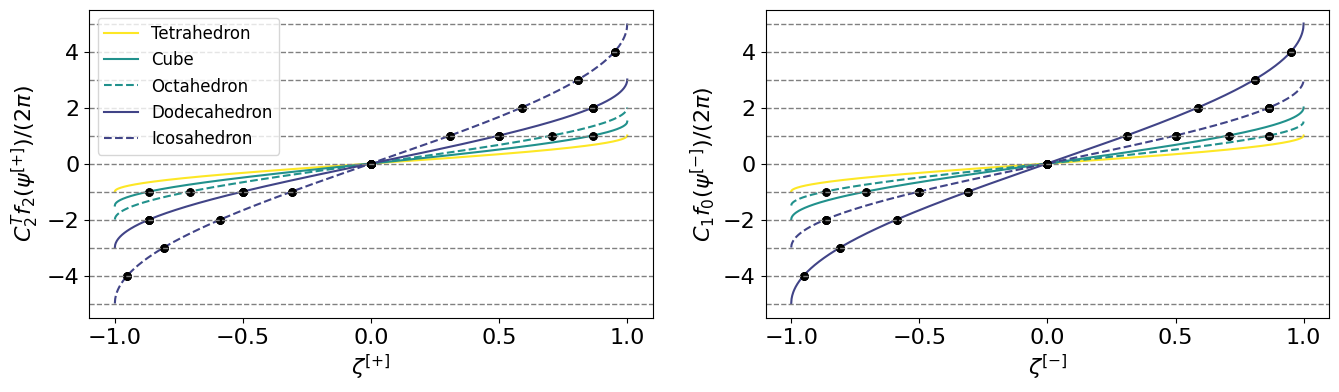

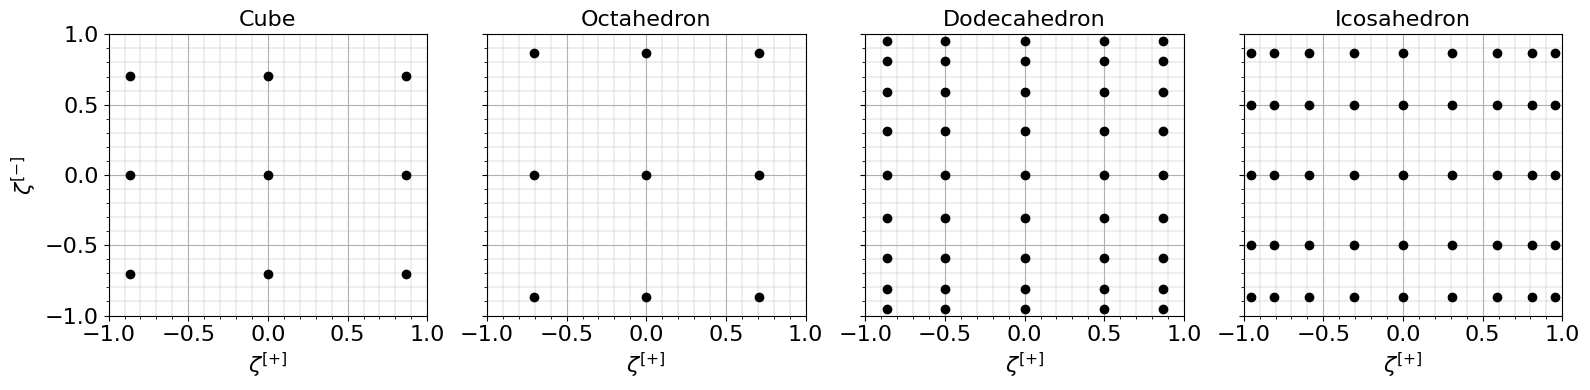

In [ ]:
ps_data_list = []

for name, (S0, S1, S2, S3) in get_platonic_solids().items():
    B = compute_boundary_matrices([S0, S1, S2, S3])
    B1, B2 = B[:2]
    C1, C2 = get_C_from_B(B1, B2)
    K1, K2 = get_K_from_B(B1, B2)

    omega = np.zeros(B1.shape[1])
    psi_minus_sp = get_psi_minus_sp(B1, K1, omega)
    psi_plus_sp  = get_psi_plus_sp(B2, K2, omega)

    # get partitions: all-plus 
    S0_plus, S0_minus = list(range(len(S0))), []
    S2_plus, S2_minus = list(range(len(S2))), []

    roots = find_what_works_nd(S0_plus, S0_minus, S2_plus, S2_minus,
                               B1, B2, K1, K2, C1, C2,
                               tol=1e-7, omega=omega)
    stable_indices, *_ = check_stable_jacobians(roots, omega,
                                               B1, B2, K1, K2, C1, C2,
                                               S0_plus, S0_minus,
                                               S2_plus, S2_minus)

    ps_data_list.append({
        "psi_plus_sp": psi_plus_sp,
        "psi_minus_sp": psi_minus_sp,
        "K1": K1, "K2": K2, "C1": C1, "C2": C2,
        "S0_plus": S0_plus, "S0_minus": S0_minus,
        "S2_plus": S2_plus, "S2_minus": S2_minus,
        "roots": roots,
        "stable_indices": stable_indices,
        "label": name.capitalize(),
    })

plot_combined_ps(ps_data_list)

Finally, let us consider the effect of inhomogeinity in the intrinsic frequencies $\vec \omega$.
We demonstrate our results in the cube - the simplest Platonic Solid that exhibits multistability - and set $\vec \omega = (0, 0, 0, 0, 0, 0, 0, 0, +\omega_0, 0, 0, \omega_0 )$.

In [15]:
def sweep_omega0_all_plus(
    B1, B2, K1, K2, C1, C2,
    omega0_vals,
    S0_plus, S2_plus,
    S0_minus=None, S2_minus=None,
    tol=1e-7
):
    """
    Sweep over omega_0 for an 'all-plus' partition on any Platonic solid.
    Uses the general `find_what_works_nd` solver to identify all phase-locked
    states and then checks stability for each omega_0.
    """
    S0_minus = S0_minus or []
    S2_minus = S2_minus or []

    stable_counts = []
    all_results = []
    all_omegas = []

    for w0 in omega0_vals:
        print(fr"$\omega_0$ = {w0:.3f}")

        # Define inhomogeneous omega distribution (customize if needed)
        omega = np.zeros(B1.shape[1])
        #omega[-2:] = [+w0, -w0]
        omega[-1] = + w0
        omega[-4] = + w0
        all_omegas.append(omega)

        # Find all candidate roots
        roots = find_what_works_nd(
            S0_plus, S0_minus, S2_plus, S2_minus,
            B1, B2, K1, K2, C1, C2,
            tol=tol, omega=omega
        )

        if not roots:
            stable_counts.append(0)
            all_results.append(([], []))
            continue

        # Stability check
        stable_indices, *_ = check_stable_jacobians(
            roots, omega,
            B1, B2, K1, K2, C1, C2,
            S0_plus, S0_minus, S2_plus, S2_minus
        )

        stable_counts.append(len(stable_indices))
        all_results.append((roots, stable_indices))

    return stable_counts, all_results, all_omegas

def plot_Fig6(
    omega0_vals, stable_counts,
    all_results, all_omegas,
    selected_omegas,
    figure_name="Fig6.pdf"
):
    """
    Styled composite plot for fixed-point analysis.

    Top plot:
        - N_stable(omega_0) with discontinuities when count drops
        - Blue squares connected by solid segments otherwise

    Bottom plots:
        - (zeta_plus, zeta_minus) scatter diagrams for manually selected omega_0
        - Grid: solid gray lines
        - omega_0 label in bordered box, upper right corner
    """

    ncols = len(selected_omegas)
    fig = plt.figure(figsize=(3 * ncols, 6))
    gs = GridSpec(2, ncols, height_ratios=[2, 3], hspace=0.25, wspace=0.25)

    # === TOP PLOT ===
    ax_top = fig.add_subplot(gs[0, :])

    x = np.asarray(omega0_vals, dtype=float)
    y = np.asarray(stable_counts, dtype=float)

    # sort by omega_0 in case the array isn't ordered
    order = np.argsort(x)
    x, y = x[order], y[order]

    # Discontinuity detection. break the line when there's a drop
    discontinuities = np.where(np.diff(y) < 0)[0]
    start_idx = 0
    for d in discontinuities:
        ax_top.plot(
            x[start_idx:d+1], y[start_idx:d+1],
            color='C0', marker='s', markersize=5,
            linewidth=1.2, zorder=3
        )
        start_idx = d + 1
    # last segment
    ax_top.plot(
        x[start_idx:], y[start_idx:],
        color='C0', marker='s', markersize=5,
        linewidth=1.2, zorder=3
    )

    ax_top.set_xlabel(r'$\omega_0$', fontsize=16, labelpad=-8)
    ax_top.set_ylabel(r"$N_{\text{stable}}$", fontsize=16)
    ax_top.grid(True)
    ax_top.tick_params(axis='both', labelsize=10)
    ax_top.yaxis.set_major_locator(MultipleLocator(2))
    ax_top.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax_top.yaxis.set_minor_locator(MultipleLocator(1))

    # === BOTTOM SCATTER PLOTS ===
    for i, w_target in enumerate(selected_omegas):
        ax = fig.add_subplot(gs[1, i])

        # find nearest index for this omega_0
        idx = np.argmin(np.abs(x - w_target))
        roots, stable_indices = all_results[idx] if idx < len(all_results) else ([], [])
        omega_val = x[idx]

        if not roots:
            ax.text(0.5, 0.5, 'No roots', ha='center', va='center', fontsize=12)
            ax.axis('off')
            continue

        # scatter roots
        for r_idx, (z_plus, z_minus, zeta_plus, zeta_minus) in enumerate(roots):
            is_stable = r_idx in stable_indices
            ax.plot(
                float(zeta_plus), float(zeta_minus),
                marker='o', markersize=6,
                markerfacecolor='black' if is_stable else 'white',
                markeredgecolor='black', markeredgewidth=1.5,
                linestyle='None'
            )

        # omega_0 label in bordered box (upper right)
        ax.plot([], [], ' ', label=fr'$\omega_0 = {omega_val:.2f}$')
        ax.legend(
            fontsize=12,
            loc='upper right',
            bbox_to_anchor=(1, 1),
            borderpad=0.2,
            handlelength=0,
            handletextpad=0,
            borderaxespad=0.1,
            frameon=True,
            fancybox=False,
            edgecolor='black',
            facecolor='white'
        )

        # axis style
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.set_aspect('equal')
        ax.grid(True, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
        ax.tick_params(axis='both', labelsize=10)
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        # labels
        if i == 0:
            ax.set_ylabel(r'$\zeta_-$', fontsize=14, labelpad=-5)
        else:
            ax.set_ylabel('')
        ax.set_xlabel(r'$\zeta_+$', fontsize=14)

    plt.tight_layout()
    plt.savefig(figure_name, bbox_inches='tight')
    plt.show()


$\omega_0$ = 0.000
total of 3 different z_n_vecs considered, and 3 different z_np1_vecs.
Phase-locked solutions:
(z_plus, z_minus) = ((-1,), (-1,))
zeta_plus = [-0.8660254], zeta_minus = [-0.70710678]
(z_plus, z_minus) = ((-1,), (0,))
zeta_plus = [-0.8660254], zeta_minus = [0.]
(z_plus, z_minus) = ((-1,), (1,))
zeta_plus = [-0.8660254], zeta_minus = [0.70710678]
(z_plus, z_minus) = ((0,), (-1,))
zeta_plus = [0.], zeta_minus = [-0.70710678]
(z_plus, z_minus) = ((0,), (0,))
zeta_plus = [0.], zeta_minus = [0.]
(z_plus, z_minus) = ((0,), (1,))
zeta_plus = [0.], zeta_minus = [0.70710678]
(z_plus, z_minus) = ((1,), (-1,))
zeta_plus = [0.8660254], zeta_minus = [-0.70710678]
(z_plus, z_minus) = ((1,), (0,))
zeta_plus = [0.8660254], zeta_minus = [0.]
(z_plus, z_minus) = ((1,), (1,))
zeta_plus = [0.8660254], zeta_minus = [0.70710678]
Solution z+ = (-1,), z- = (-1,): is stable.
Solution z+ = (-1,), z- = (0,): is stable.
Solution z+ = (-1,), z- = (1,): is stable.
Solution z+ = (0,), z- = (-1,): is

C:\Users\i.bacic\AppData\Local\Temp\ipykernel_6256\1887830453.py:130: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(zeta_plus), float(zeta_minus),
C:\Users\i.bacic\AppData\Local\Temp\ipykernel_6256\1887830453.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


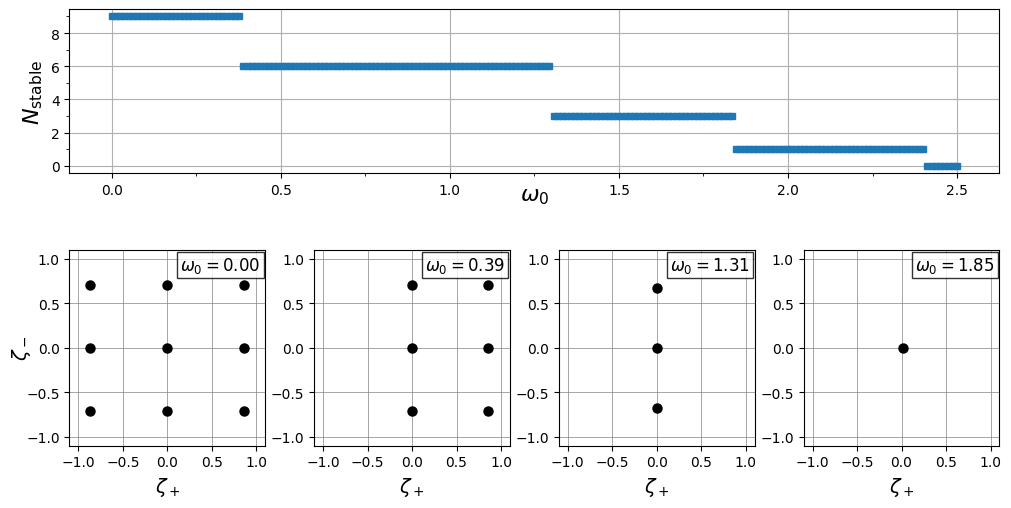

In [16]:
selected_omegas = [0.0, 0.39, 1.31, 1.85]

omega0_vals = np.linspace(0.0, 2.5, 200)


B1c, B2c = compute_boundary_matrices(solids['cube'][:3])
C1c, C2c = get_C_from_B(B1c, B2c)
K1c, K2c = get_K_from_B(B1c, B2c)

stable_counts, all_results, all_omegas = sweep_omega0_all_plus(
    B1c, B2c, K1c, K2c, C1c, C2c,
    omega0_vals=omega0_vals,
    S0_plus=list(range(8)),  # cube vertices
    S2_plus=list(range(6))   # cube faces
)

plot_Fig6(
    omega0_vals,
    stable_counts,
    all_results,
    all_omegas,
    selected_omegas,
    figure_name="Fig6.pdf"
)
